# Homework 3

Unzip the zip file that contains the homework and the data associated with it, then run the code below:

In [1]:
import os
import sys
import hashlib
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

assert os.path.exists('../homeworks/HW3.ipynb')
assert os.path.exists('../data/hw3-task2-data.csv')
assert os.path.exists('../data/BreastTissue.xlsx')



## Task 1

Run the code below before you start working on your homework:


In [2]:
info = sys.platform + '\n' + sys.version + '\n' + os.getcwd() + '\n' 
name = hashlib.sha256(info.encode('utf-8')).hexdigest()
with open('../other/'+name,'w') as f:
    f.write(info)

In [3]:
# NOTE: "os.getlogin()" gives error; I intentionally removed it from the info....

In [4]:
with open('../other/'+name,'r') as f:
    info = f.read()
name = hashlib.sha256(info.encode('utf-8')).hexdigest()
assert os.path.exists('../other/'+name)

## Task 2

Using [`pandas.read_csv`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html) function read the data file '`data/hw3-task2-data.csv`' below:

In [7]:
task2_data = pd.read_csv("../data/hw3-task2-data.csv")
task2_data.head(10)

,x,y,c
1,-2.873979,-1.977563,0
2,-1.939798,-2.758217,0
3,-1.954560,2.657385,0
4,-3.284104,1.952121,0
5,-1.954758,2.351581,0
6,-1.133108,2.649699,0
7,-0.063933,-2.703307,0
8,2.272370,-1.921207,0
9,2.627003,-2.284012,0
10,1.695585,-3.618690,0


Now, using the [`train_test_split`](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) function of `sklearn`, create training and testing data subsets. Use 25% of your data as test, and remaining as your training data sets.

In [20]:
task2_data.iloc[:,0:2]

,x,y
1,-2.873979,-1.977563
2,-1.939798,-2.758217
3,-1.954560,2.657385
4,-3.284104,1.952121
5,-1.954758,2.351581
6,-1.133108,2.649699
7,-0.063933,-2.703307
8,2.272370,-1.921207
9,2.627003,-2.284012
10,1.695585,-3.618690


In [79]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(task2_data.iloc[:,0:2], task2_data.iloc[:,2], test_size=0.25)

Now, using [`sklearn.cluster.KMeans`](http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html) create a k-means model below for 2 clusters, train it and use the test dataset to make predictions:

In [80]:
model = KMeans(n_clusters=2) # <- YOUR CODE GOES HERE

model.fit(Xtrain, Ytrain) # <- YOUR CODE SHOULD REPLACE ?????
predictions =  model.predict(Xtest)

Now, using [`sklearn.metrics.confusion_matrix`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html) construct the confusion matrix, and calculate your accuracy using sklearn's [cross-validation tools](http://scikit-learn.org/stable/modules/model_evaluation.html).  Try to repeat your experiments until you reach a reasonable accuracy result.

In [81]:
from sklearn.metrics import accuracy_score

In [82]:
cm = confusion_matrix(Ytest,predictions) # <- YOUR CONFUSION MATRIX CODE GOES HERE
accuracy = accuracy_score(Ytest,predictions)

print(accuracy)
print(cm)

0.41596638655462187
[[53 78]
 [61 46]]


As you observed, your accuracy is really terrible.  Inspect the data, make a plot and observe that k-means **will never** produce a usable estimate of clusters for this dataset:

In [83]:
import matplotlib.pyplot as plt

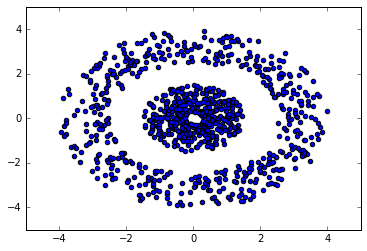

In [84]:
plt.scatter(task2_data.iloc[:,0], task2_data.iloc[:,1])
plt.show()

In [85]:
#Our model result
centroids = model.cluster_centers_
labels = model.labels_

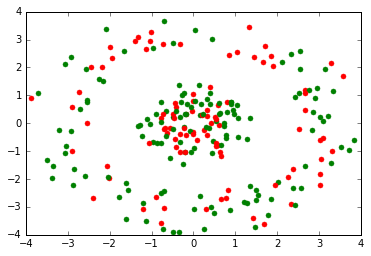

In [86]:
colors = ["g.", "r."]
for i in range(len(Xtest)):
    plt.plot(Xtest.iloc[i,0],Xtest.iloc[i,1], colors[labels[i]], markersize = 10)
plt.show()

In this cell, write an explanation as to why the k-means algorithm will never work:

### Your explanation goes below
As seen from the plot above, the boundry between the classes can not the seperated with lines.

## Task 3

Now, instead of using k-means model, let us use a k-nn model.  Below, using [`sklearn.neighbors.KNeighborsClassifier`](http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html) create a model, train it and use the test dataset to make predictions.  Use the same train-test datasets we created earlier.  You are free to choose the parameters 'k' and the 'metric':

In [ ]:
model = KNeighborsClassifier(?????)
????? # <- YOUR CODE SHOULD REPLACE ?????
predictions =  # <- YOUR CODE GOES HERE

Now, construct the confusion matrix, and calculate your accuracy.

In [ ]:
cm = confusion_matrix(??????) # <- YOUR CONFUSION MATRIX CODE GOES HERE
accuracy = # <- YOUR ACCURACY CODE GOES HERE
accuracy

Accuracy is much better. Explain below why, in theory, this method does produce better results in this case:

### Your explanation goes below

HERE

## Task 4

Using [`pandas.read_excel`]() read the [Breast Tissue Data Set](https://archive.ics.uci.edu/ml/datasets/Breast+Tissue) which is at 'data/BreastTissue.xlsx'

In [ ]:
data = # your code goes here
data.head(10)
xs = data.iloc[:,1:]
ys = data.iloc[:,0]

Now, create a k-nn model, train and test it. Your dependent variable is `Class` column. You are free to choose `k` and the `metric`:

In [ ]:
Xtrain, Xtest, Ytrain, Ytest = # CODE GOES HERE

In [ ]:
model = ????
model.fit(????)
predicted = ????
cm = ????
accuracy = ??????
print(cm)
print(accuracy)

Now, using [feature scaling](http://scikit-learn.org/stable/modules/preprocessing.html), specifically, using [`StandardScaler`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler) normalize the feature columns `xs` we defined earlier below:

In [ ]:
scaler = StandardScaler()
scaler.fit(??)
xs = ?? # your code goes here

Now, repeat mdoel construction, training, testing and accuracy calculation

In [ ]:
Xtrain, Xtest, Ytrain, Ytest = ???
model = ??
model.fit(??)
predicted = ??
cm = ??
accuracy = ??????
print(cm)
print(accuracy)

Why did we get better results? Explain below:

### Your explanation goes below

HERE

## Task 5

Now, construct a k-nn model for the same dataset [Breast Tissue Data Set](https://archive.ics.uci.edu/ml/datasets/Breast+Tissue) which is at 'data/BreastTissue.xlsx' first using the original data, then again, using feature scaling. At the end compare accuracies.

In [ ]:
## Your code goes here